In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

housing=fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full, random_state=42)

mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline=make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_valid)
mse=mean_squared_error(y_valid, y_pred)
print("Validation MSE:", mse)



Validation MSE: 0.25536110312129084


In [ ]:
#Implementing MLPs with Keras
import tensorflow as tf
import numpy as np

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train,y_train=X_train_full[:50000], y_train_full[:50000]
X_valid, y_valid = X_train_full[50000:], y_train_full[50000:]

In [10]:
X_train.shape
X_train,X_valid,X_test=X_train / 255.0, X_valid / 255.0, X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Creating model using sequential api

tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.layers
hidden1=model.layers[1]
hidden1.name
weight,biases=hidden1.get_weights()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=50,validation_data=(X_valid, y_valid))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5709 - loss: 1.0972 - val_accuracy: 0.5920 - val_loss: 1.0924
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5752 - loss: 1.0811 - val_accuracy: 0.5942 - val_loss: 1.0767
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5805 - loss: 1.0665 - val_accuracy: 0.5994 - val_loss: 1.0618
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5839 - loss: 1.0531 - val_accuracy: 0.6047 - val_loss: 1.0454
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5883 - loss: 1.0406 - val_accuracy: 0.6086 - val_loss: 1.0313
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5930 - loss: 1.0291 - val_accuracy: 0.6140 - val_loss: 1.0168
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5978 - loss: 1.0183 - val_accuracy: 0.6183 - val_loss: 1.0031
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6008 - loss: 1.0083 - 

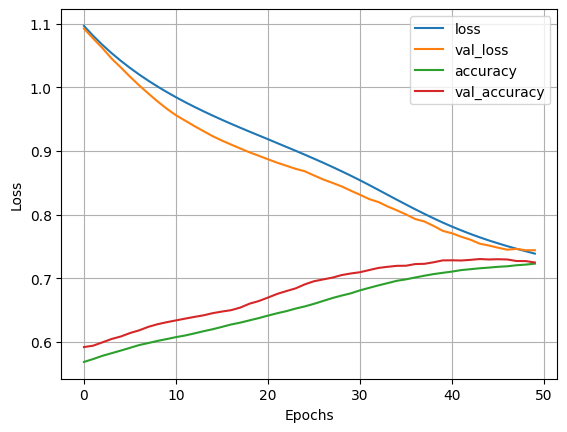

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


In [32]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7202 - loss: 0.7452


[0.7510115504264832, 0.7197999954223633]

The interpolated value is :  11.60842962962963


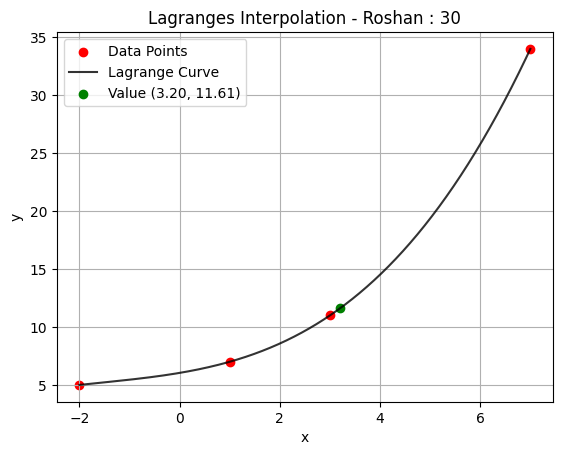

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=[-2,1,3,7]
y=[5,7,11,34]

plt.scatter(x, y, color='red', label='Data Points')


xp=float(input("Enter value of x : "))
n=4

def lagrange_interpolation(x, y, xp):
    yp=0
    for i in range (n):
        p=1
        for j in range(n):
            if i!=j:
                p=p*(xp-x[j])/(x[i]-x[j])
        
        yp=yp+y[i]*p
    return yp

x_dense = np.linspace(min(x), max(x), 500)
y_dense = [lagrange_interpolation(x, y, xd) for xd in x_dense]
plt.plot(x_dense, y_dense, color='black', alpha=0.8, label='Lagrange Curve')

yp=lagrange_interpolation(x,y,xp)
print("The interpolated value is : " , lagrange_interpolation(x,y,xp))
plt.scatter(xp,yp,color='green',label=f'Value ({xp:.2f}, {yp:.2f})')

plt.title("Lagranges Interpolation - Roshan : 30")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

